<a href="https://colab.research.google.com/github/tensorvijay/Mtechcen/blob/master/PulsarAstronomy2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!unzip '/content/drive/MyDrive/PULSAR/pulsarassign1.zip'

Archive:  /content/drive/MyDrive/PULSAR/pulsarassign1.zip
   creating: fitsfiles/
  inflating: fitsfiles/J0034-0721.1400MHz.psrfits  
  inflating: fitsfiles/J0051+0423.1400MHz.psrfits  
  inflating: fitsfiles/J0108-1431.1400MHz.psrfits  
  inflating: fitsfiles/J0134-2937.1400MHz.psrfits  
  inflating: fitsfiles/J0151-0635.1400MHz.psrfits  
  inflating: fitsfiles/J0152-1637.1400MHz.psrfits  
  inflating: fitsfiles/J0206-4028.1400MHz.psrfits  
  inflating: fitsfiles/J0211-8159.1400MHz.psrfits  
  inflating: fitsfiles/J0255-5304.1400MHz.psrfits  
  inflating: fitsfiles/J0304+1932.1400MHz.psrfits  
  inflating: fitsfiles/J0343-3000.1400MHz.psrfits  
  inflating: fitsfiles/J0401-7608.1400MHz.psrfits  
  inflating: fitsfiles/J0448-2749.1400MHz.psrfits  
  inflating: fitsfiles/J0450-1248.1400MHz.psrfits  
  inflating: fitsfiles/J0452-1759.1400MHz.psrfits  
  inflating: fitsfiles/J0459-0210.1400MHz.psrfits  
  inflating: fitsfiles/J0520-2553.1400MHz.psrfits  
  inflating: fitsfiles/J0525+1115.

In [105]:
import glob as glob
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

Import addresses using glob.glob

In [6]:
psraddlist = glob.glob('../content/fitsfiles/*.psrfits') #Save the addresses into a list

In [7]:
psraddlist[0]  #The pulsar to be worked on

'../content/fitsfiles/J1913+0904.1400MHz.psrfits'

In [9]:
hdul = fits.open(psraddlist[0])

In [10]:
len(psraddlist)

602

In [11]:
hdul.info()

Filename: ../content/fitsfiles/J1913+0904.1400MHz.psrfits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      64   ()      
  1  HISTORY       1 BinTableHDU     71   8R x 28C   [24A, 256A, 8A, 8A, 1J, 1I, 1I, 1I, 1D, 1D, 1J, 1D, 1D, 1D, 1I, 1I, 1I, 1I, 1I, 32A, 32A, 32A, 256A, 32A, 32A, 1I, 32A, 1I]   
  2  PSRPARAM      1 BinTableHDU     12   10R x 1C   [128A]   
  3  T2PREDICT     1 BinTableHDU     12   22R x 1C   [128A]   
  4  BANDPASS      1 BinTableHDU     20   1R x 3C   [2E, 2E, 2050I]   
  5  SUBINT        1 BinTableHDU     89   1R x 20C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1E, 1E, 1E, 1E, 1E, 1D, 1D, D, E, 4E, 4E, 4096I]   
  6  DIG_STAT      1 BinTableHDU     21   1R x 2C   [2E, 24E]   
  7  DIG_CNTS      1 BinTableHDU     24   1R x 3C   [E, E, 1024I]   


In [12]:
psparam = hdul[2] # Load The PSPARAM

In [13]:
psparam.header

XTENSION= 'BINTABLE'           / ***** Pulsar ephemeris *****                   
BITPIX  =                    8 / N/A                                            
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  128 / width of table in bytes                        
NAXIS2  =                   10 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    1 / Number of fields per row                       
TTYPE1  = 'PARAM   '           / Text file stored row by row                    
TFORM1  = '128A    '           / Allow 128 char per row                         
EXTNAME = 'PSRPARAM'           / Name of this binary table extension            
EXTVER  =                    1 / auto assigned by template parser               

In [14]:
psparam.data

FITS_rec([('PSRJ            J1913+0904',),
          ('RAJ             19:13:21.061             8.000e-03',),
          ('DECJ            +09:04:45.4              4.000e-01',),
          ('DM              95.3                     6.000e-01',),
          ('PEPOCH          53249.00000',),
          ('F0              6.1257324056             4.000e-10',),
          ('F1              -6.6106E-13              3.000e-17',),
          ('F2              -2.3E-23                 8.000e-24',),
          ('EPHVER          2',), ('UNITS           TDB',)],
         dtype=(numpy.record, [('PARAM', 'S128')]))

In [160]:
subint.header

XTENSION= 'BINTABLE'           / ***** Subintegration data  *****               
BITPIX  =                    8 / N/A                                            
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                 8336 / width of table in bytes                        
NAXIS2  =                    1 / Number of rows in table (NSUBINT)              
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   20 / Number of fields per row                       
TTYPE1  = 'INDEXVAL'           / Optionally used if INT_TYPE != TIME            
TFORM1  = '1D      '           / Double                                         
TTYPE2  = 'TSUBINT '           / Length of subintegration                       
TFORM2  = '1D      '           / Double                                         
TTYPE3  = 'OFFS_SUB'        

In [164]:
subint.header['NBIN']

1024

In [16]:
subint.data

FITS_rec([(0., 3329.41440776, 2159.69506224, 76951.17537153, -71.66228011, 9.07925777, 43.50212369, -0.68449579, 0., 145.25818, 145.25818, -42.03996, 51.979588, 0., 0., 1375.64501953, 98124., [46528.133  ,   273.32147, -1639.3774 ,   648.54803], [0.00092545, 0.00049389, 0.0004871 , 0.00023481], [[[-13827, -12422, -11637, -11518,  -8766,  -9539, -10632, -11810, -10949, -13701,  -9231, -12152, -12232, -11890, -11379, -12966, -11708,  -9298,  -9881, -11510,  -9573, -10725, -10847, -10830, -11092, -10391,  -8374, -10370, -11421, -12666, -10602, -12692, -11801, -11544, -11776, -12700, -10290, -10687, -11767, -12114, -14600,  -8593, -13312, -10982, -11396, -11869, -12088, -11548, -13105, -13114, -11244, -13266, -12789,  -9497, -12574, -10332, -10615, -11413, -10653, -12350, -12645, -10244, -10450,  -9750, -12198, -11261, -12759, -11531, -12021, -11468, -12692, -13933, -10201, -12460, -12135, -12949,  -9809, -13177, -12244, -11611, -11147, -11805,  -8547, -10767, -11725, -13059,  -9378, -1262

In [17]:
len(subint.data)

1

In [18]:
data= subint.data['DATA']

In [19]:
offset=subint.data['DAT_OFFS']

In [20]:
scale=subint.data['DAT_SCL']

In [21]:
offset.shape

(1, 4)

In [22]:
scale.shape

(1, 4)

In [23]:
data.shape

(1, 4, 1, 1024)

In [24]:
data.T.shape

(1024, 1, 4, 1)

In [25]:
data

array([[[[-13827, -12422, -11637, ..., -12569, -11772, -12004]],

        [[ -5610,  -7138,  -7329, ...,  -7789,  -5801,  -8810]],

        [[ -9884, -10995, -11258, ..., -11263, -11469,  -9569]],

        [[ -5507,  -3655,  -6209, ...,  -7886,  -4296,  -3942]]]],
      dtype=int16)

In [26]:
data1=np.reshape(data.T,[1024,4])

In [27]:
data1.shape

(1024, 4)

In [28]:
data1

array([[-13827,  -5610,  -9884,  -5507],
       [-12422,  -7138, -10995,  -3655],
       [-11637,  -7329, -11258,  -6209],
       ...,
       [-12569,  -7789, -11263,  -7886],
       [-11772,  -5801, -11469,  -4296],
       [-12004,  -8810,  -9569,  -3942]], dtype=int16)

In [29]:
rawiquv=scale*data1+offset  #applying scale and offset transformation to seprate the four profiles

In [30]:
rawiquv

array([[46515.336  ,   270.55072, -1644.1919 ,   647.25494],
       [46516.637  ,   269.79605, -1644.7332 ,   647.6898 ],
       [46517.363  ,   269.70172, -1644.8612 ,   647.0901 ],
       ...,
       [46516.5    ,   269.47452, -1644.8636 ,   646.69635],
       [46517.24   ,   270.4564 , -1644.964  ,   647.5393 ],
       [46517.023  ,   268.97028, -1644.0385 ,   647.62244]],
      dtype=float32)

In [41]:
I=rawiquv[:,0]
Q=rawiquv[:,1]
U=rawiquv[:,2]
V=rawiquv[:,3]

#The sorted values of each of the polarizaiton levels
I_srt=np.sort(I)
Q_srt=np.sort(Q)
U_srt=np.sort(U)
V_srt=np.sort(V)


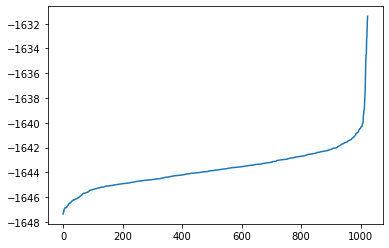

In [44]:
plt.plot(U_srt)

Let us compare between Zhang Fit and simple base line removal

In [52]:
def basremown(pol):
  brempol=pol-np.mean(pol[450:650])  #removing the center averaged values of the sorted array 
  return brempol  #baseline function for rmoving the mean value of some middle elements
  

In [64]:
I_brem=basremown(I_srt)               # Baseline rmoved versions of I,Q,U and V 
Q_brem=basremown(Q_srt)
U_brem=basremown(U_srt)
V_brem=basremown(V_srt)


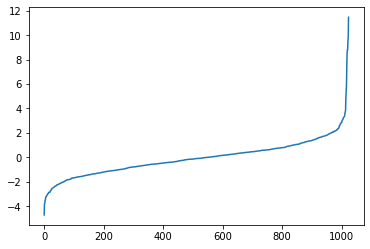

In [80]:
plt.plot(Q_brem)
#plt.plot(Q_srt)

We are comparing between the sorted result of Q and the baseline removed version of Q

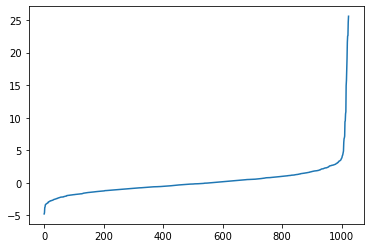

In [82]:
plt.plot(I_brem)

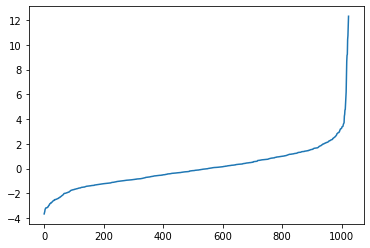

In [81]:
plt.plot(U_brem)

In [68]:
I_srt[500:600]

array([46517.562, 46517.562, 46517.57 , 46517.57 , 46517.58 , 46517.582,
       46517.586, 46517.586, 46517.586, 46517.594, 46517.594, 46517.598,
       46517.598, 46517.598, 46517.6  , 46517.6  , 46517.6  , 46517.6  ,
       46517.605, 46517.605, 46517.61 , 46517.61 , 46517.613, 46517.62 ,
       46517.62 , 46517.62 , 46517.625, 46517.63 , 46517.633, 46517.637,
       46517.637, 46517.645, 46517.645, 46517.645, 46517.65 , 46517.652,
       46517.668, 46517.668, 46517.668, 46517.688, 46517.688, 46517.688,
       46517.69 , 46517.69 , 46517.69 , 46517.69 , 46517.69 , 46517.7  ,
       46517.707, 46517.71 , 46517.71 , 46517.715, 46517.72 , 46517.723,
       46517.727, 46517.727, 46517.727, 46517.727, 46517.73 , 46517.74 ,
       46517.742, 46517.746, 46517.758, 46517.766, 46517.77 , 46517.773,
       46517.777, 46517.777, 46517.78 , 46517.785, 46517.785, 46517.79 ,
       46517.793, 46517.8  , 46517.8  , 46517.8  , 46517.805, 46517.805,
       46517.805, 46517.816, 46517.83 , 46517.832, 

In [76]:
L=np.sqrt(U_brem**2 + Q_brem**2)
phi= 0.5*np.arctan(U_brem/Q_brem)

In [84]:

phideg=phi*(180/np.pi)

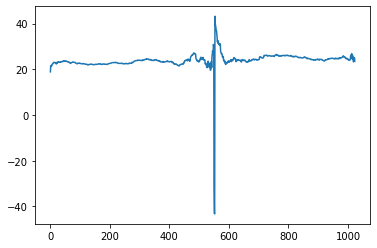

In [86]:
plt.plot(phideg) #polarization angle 

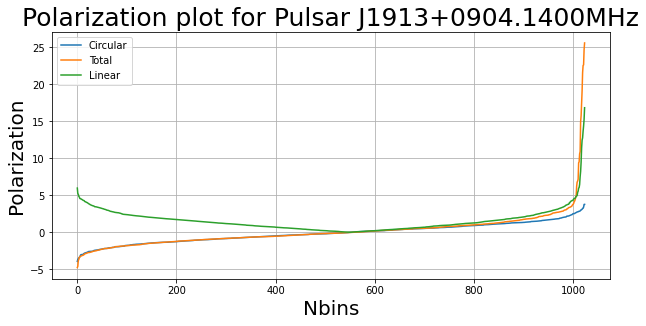

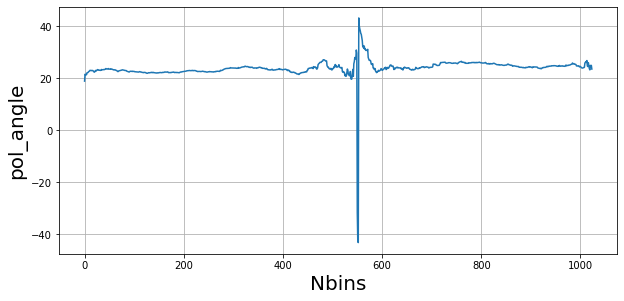

<Figure size 432x288 with 0 Axes>

In [158]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.xlabel('Nbins',fontsize=20)
plt.ylabel('Polarization',fontsize=20)
plt.title('Polarization plot for Pulsar J1913+0904.1400MHz',fontsize=25)
plt.plot(V_brem)
plt.grid()
plt.plot(I_brem)
plt.plot(L)
plt.gca().legend(('Circular','Total','Linear'))
#plt.show()
plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
#
plt.grid()
plt.xlabel('Nbins',fontsize=20)
plt.ylabel('pol_angle',fontsize=20)
plt.plot(phideg)
fig = plt.gcf()
plt.show()
plt.gci()
plt.savefig('pul3')  #plot image is in degrees

Number of Time Bins

In [ ]:
subint.header['NBIN']

1024

The Contents of the subint header

In [ ]:
subint.header

XTENSION= 'BINTABLE'           / ***** Subintegration data  *****               
BITPIX  =                    8 / N/A                                            
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                 8336 / width of table in bytes                        
NAXIS2  =                    1 / Number of rows in table (NSUBINT)              
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   20 / Number of fields per row                       
TTYPE1  = 'INDEXVAL'           / Optionally used if INT_TYPE != TIME            
TFORM1  = '1D      '           / Double                                         
TTYPE2  = 'TSUBINT '           / Length of subintegration                       
TFORM2  = '1D      '           / Double                                         
TTYPE3  = 'OFFS_SUB'        